In [ ]:
%cd drive/MyDrive/Sem3Week2_AI/Datasets

/content/drive/MyDrive/Sem3Week2_AI/Datasets


3 To - Do - Task

Please Complete all the problem listed below.

3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object                   (b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [3]:
#q.no.1
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/DataSets/bank .csv")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#q.no.2
dataset.info()
# (a) Identify columns with dtypes=object
object_columns = dataset.select_dtypes(include='object').columns
print("\nColumns with dtype=object:", object_columns)
# (b) Get unique values of those columns
for column in object_columns:
    print(f"\nUnique values in {column}:", dataset[column].unique())
# (c) Check for null values in each column
null_values = dataset.isnull().sum()
print("\nNull values in each column:\n", null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with dtype=object: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'co

In [8]:
#qn.3
# Drop object dtype columns
numeric_df = dataset.drop(columns=object_columns)
# Save to a new CSV file
numeric_df.to_csv('banknumericdata.csv', index=False)
print("\nNumeric data saved to 'banknumericdata.csv'.")

#qn.4
# Read the new CSV
numeric_df = pd.read_csv('banknumericdata.csv')
# Display summary statistics
print("\n",numeric_df.describe())


Numeric data saved to 'banknumericdata.csv'.

                 age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.00

Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [14]:
#q.no.1
import pandas as pd
#load dataset
medical_df = pd.read_csv("/content/drive/MyDrive/DataSets/medical_students_dataset.csv")
#display first 5 rows
medical_df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [10]:
#qn.2
# Display DataFrame info
print(medical_df.info())
# Identify columns with missing values
missing_values = medical_df.isnull().sum()
print("\nMissing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Missing values in each column:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight      

In [13]:
#qn.3
# Example of filling missing values
for column in medical_df.columns:
    if medical_df[column].isnull().sum() > 0:
        if medical_df[column].dtype == 'object':
            # Fill missing values with mode for categorical data
            medical_df[column].fillna(medical_df[column].mode()[0], inplace=True)
            print(f"\nFilled missing values in {column} with mode.")
        else:
            # Fill missing values with mean for numerical data
            medical_df[column].fillna(medical_df[column].mean(), inplace=True)
            print(f"\nFilled missing values in {column} with mean.")

# Verify if missing values are handled
print("\nUpdated missing values count:\n", medical_df.isnull().sum())


Updated missing values count:
 Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [12]:
#qn.4
# Count duplicate rows
duplicate_count = medical_df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)
# Drop duplicate rows if any
if duplicate_count > 0:
    medical_df = medical_df.drop_duplicates()
    print("\nDuplicates removed.")
# Display updated DataFrame shape
print("\nUpdated DataFrame shape:", medical_df.shape)


Number of duplicate rows: 12572

Duplicates removed.

Updated DataFrame shape: (187428, 13)


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Dataset Used: "titanic.csv"

Problem - 1:
Create a DataFrame that is subsetted for the columns 'Name', 'Pclass', 'Sex', 'Age', 'Fare', and 'Survived'. Retain only those rows where 'Pclass' is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the 'Fare' column?

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/DataSets/Titanic-Dataset.csv')

# Subset the DataFrame
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only first-class passengers
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate statistics for 'Fare'
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Max Fare:", max_fare)
print("Min Fare:", min_fare)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


Problem - 2: How many null values are contained in the 'Age' column in your subsetted DataFrame? Once you've found this out, drop them from your DataFrame.

In [ ]:
# Count null values in 'Age'
null_count_age = first_class_df['Age'].isnull().sum()
print("Number of null values in 'Age':", null_count_age)

# Drop rows with null values in 'Age'
cleaned_df = first_class_df.dropna(subset=['Age'])
print("DataFrame after dropping nulls:", cleaned_df.shape)

Number of null values in 'Age': 30
DataFrame after dropping nulls: (186, 6)


Problem - 3:

The 'Embarked' column in the Titanic dataset contains categorical data representing the ports of embarkation:

• 'C' for Cherbourg

• 'Q' for Queenstown

• 'S' for Southampton

Task:
1. Use one-hot encoding to convert the 'Embarked' column into separate binary columns ('Embarked C',
'Embarked Q', 'Embarked S').
2. Add these new columns to the original DataFrame.
3. Drop the original 'Embarked' column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:


# One-hot encode 'Embarked'
one_hot_df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
print(one_hot_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates ('Survived') for the different groups in the 'Sex' column. Draw a visualization to show how the survival distributions vary by gender.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


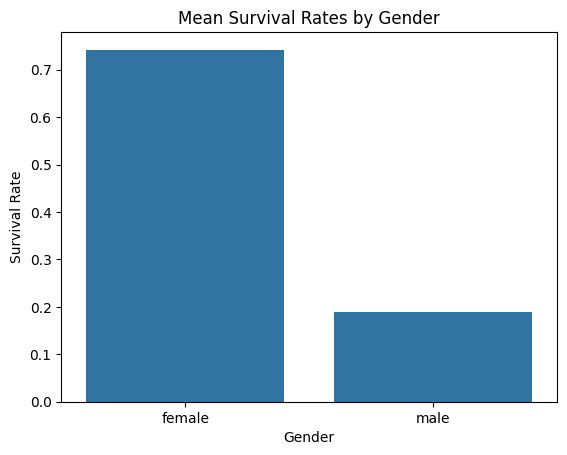

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Sex' and calculate mean survival rates
survival_rates_by_sex = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_rates_by_sex)

# Visualization
sns.barplot(x=survival_rates_by_sex.index, y=survival_rates_by_sex.values)
plt.title("Mean Survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation ('Embarked'). In this instance, compare the ports 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


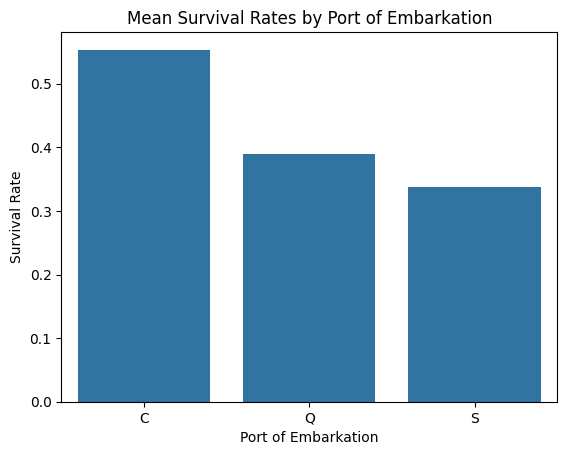

In [ ]:
# Group by 'Embarked' and calculate mean survival rates
survival_rates_by_embarkation = df.groupby('Embarked')['Survived'].mean()
print(survival_rates_by_embarkation)

# Visualization
sns.barplot(x=survival_rates_by_embarkation.index, y=survival_rates_by_embarkation.values)
plt.title("Mean Survival Rates by Port of Embarkation")
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarkation")
plt.show()